In [13]:
import pandas as pd
import yfinance as yf
import matplotlib 

In [14]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")

In [15]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-15 00:00:00-05:00,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,0.0,0.0
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,0.0,0.0
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,0.0,0.0


In [16]:
#We have a look of the index (Date coloum)
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-12-08 00:00:00-05:00', '2023-12-11 00:00:00-05:00',
               '2023-12-12 00:00:00-05:00', '2023-12-13 00:00:00-05:00',
               '2023-12-14 00:00:00-05:00', '2023-12-15 00:00:00-05:00',
               '2023-12-18 00:00:00-05:00', '2023-12-19 00:00:00-05:00',
               '2023-12-20 00:00:00-05:00', '2023-12-21 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24110, freq=None)

***Cleaning and Visualizing our Stock Market Data***

<Axes: xlabel='Date'>

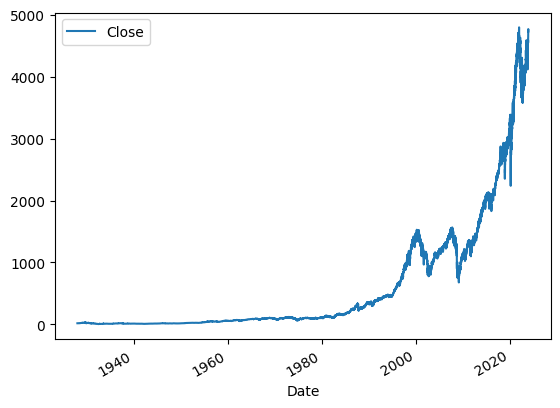

In [17]:
sp500.plot.line(y="Close", use_index=True)

In [18]:
#I remove the coloumns we don't need: "Dividents" and "Stock Splits", this colomns are more approprier for individual stocks not for the index
del sp500["Dividends"]
del sp500["Stock Splits"]

***Setting up our target for machine learning***

In [19]:
#.shift(-1): Shifts the values in the selected column by one position backward. 

sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [20]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-12-15 00:00:00-05:00,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098


In [21]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-12-15 00:00:00-05:00,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059,1
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,1
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098,0


In [22]:
#The colon (:) on its own is shorthand for "select all the way to the end.
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-12-15 00:00:00-05:00,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059,1
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,1
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098,0


***Training an initial machine learning model***

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
# n_estimators is the number of individual trees I want to train
# min_samples_split helps to protect from overfitting, decision trees have the trend to overhead
# random_state ensures reproducibility, meaning that if you run the model with the same data and the same parameters, you should get the same results. 

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100] #excluding the last 100 rows
test = sp500.iloc[-100:]  #this selects the last 100 rows 

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
RandomForestClassifier(min_samples_split=100, random_state=1)

<Axes: xlabel='Date'>

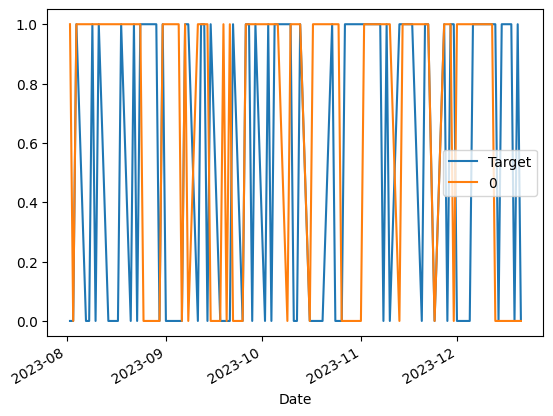

In [27]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

preds = pd.Series(preds, index=test.index)

precision_score(test["Target"], preds)

combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

****Building a backtesting system****

Building a backtesting system is a process of creating a framework to test the performance of a trading or investment strategy using historical data. Backtesting involves simulating the execution of trades based on historical market data to evaluate how well a given strategy would have performed in the past.

In [28]:
#we create a "prediction" function, a wrap of what we have done in one function

def predict(train,test,predictors,model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions") 
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [29]:
# Every trading year has about 250 days, so we take 10 years of data and we train the first module with them, step 250 will pass year by year
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [30]:
#We do the backtest

predictions = backtest(sp500, model, predictors)

In [34]:
#we calculate how many times the market will go up (1) or down (0)

predictions["Predictions"].value_counts() 

Predictions
0    3464
1    2596
Name: count, dtype: int64

In [35]:
Precision Score

precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

Across 3464 days + 2596 days we are 52.8% of the time accurate about our result

In [36]:
#We create a benchmark Predictions: the number of days where the market actually went up devided by the number of total rows

predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.534323
0    0.465677
Name: count, dtype: float64

The market went up 53.4% of days and went down 46.6% of the days

***Adding additional predictors to our model***

In [37]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"] #this time we shift forward
    
    new_predictors += [ratio_column, trend_column]

In [39]:
sp500 = sp500.dropna()

In [40]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-14 00:00:00-05:00,4721.040039,4738.569824,4694.339844,4719.549805,6314040000,4719.189941,0,1.001322,2.0,1.012903,5.0,1.073133,36.0,1.111284,134.0,1.192991,529.0
2023-12-15 00:00:00-05:00,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059,1,0.999962,1.0,1.007858,4.0,1.071470,36.0,1.110293,134.0,1.192454,528.0
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,1,1.002259,1.0,1.007340,4.0,1.074613,37.0,1.114353,135.0,1.197400,528.0


In [41]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)


def predict(train,test,predictors,model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors]) [:,1] #Predict_proba returns the probability that the row will be a 0(price down tomorrow) or 1(price up tomorrow) 
    preds[preds >= .6] = 1 #we make more control of what becomes a one and what becomes a zero
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions") 
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [42]:
predictions = backtest(sp500, model, new_predictors)
predictions["Predictions"].value_counts()

Predictions
0.0    4229
1.0     830
Name: count, dtype: int64

The distribution is different now, there are only a few days that predict the price will go up and this because we change the threshold 

 - preds[preds >= .6] = 1 
 
 - preds[preds < .6] = 0

In [45]:
precision_score(predictions["Target"], predictions["Predictions"])

0.572289156626506

When we buy a stock, so when the model predict that the price will go up, 57% of the time, it will be actually go up

***Summary and next steps with the model***

- we downloaded stock data for the sp500 index

- we cleaned and visualized the data

- we set up our machine learning target

- we trained our initial model

- we evaluated error and created a way to back test and measure that error over long periods of time

- we improved our model with some extra predictor columns 

Various exchanges operate overnight, and global indexes commence trading before the S&P 500 and U.S. markets. It is crucial to assess their prices to validate potential correlations. Additional factors to consider include incorporating news, monitoring key components of the S&P 500 such as prominent stocks and vital sectors. For instance, if the technology sector experiences a downturn, the S&P 500 may follow suit, albeit not necessarily immediately – a lag of up to six months is plausible. Moreover, increasing the temporal resolution to hourly, minute-by-minute, or even tick data, if available, enhances the granularity of analysis and provides a more nuanced understanding of market dynamics.